In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Read data

In [206]:
df = pd.read_csv('train.csv', header=0)

In [207]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 2.Show Survival Sount and Survival Rate

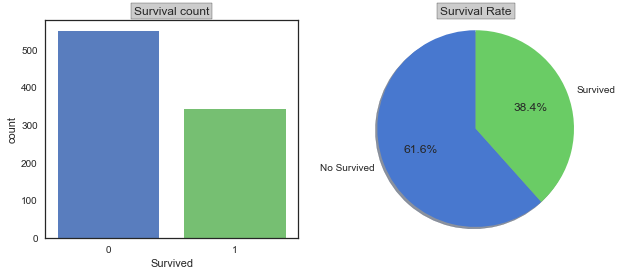

In [212]:
## At first show the total survived and notsurvived number
## count the number of survived passengers and number of notsurvived passengers
survived_num = df['Survived'].sum()
no_survived_num = 891 - survived_num

##show the number of survived passengers and notsurvived passengers 
plt.figure(figsize = (10,4))
plt.subplot(121)
sns.countplot(x='Survived',data=df)
plt.title('Survival count',bbox={'facecolor':'0.8','pad':3})

## show the rate of survived and notsurvived passengers
## 61.6% of the total passengers survived
plt.subplot(122)
labels='No Survived','Survived'
sizes = no_survived_num,survived_num
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
sns.set(style="white", palette="muted", color_codes=True)
plt.title('Survival Rate',bbox={'facecolor':'0.8','pad':3}) 

plt.show()


## 3. Gender


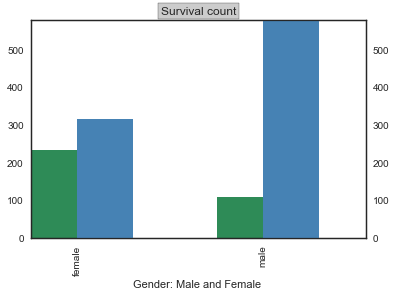

,Survivor,Gender,PassengerNum,Ratio
Sex,,,,
female,233,female,314,74.203822
male,109,male,577,18.890815


In [213]:
## to show the relationship between gender and survive

GEN = pd.DataFrame()

## according to Sex, count the number of survived and notsurvived passengers and raito
GEN['Survivor'] = df[['Survived','Sex']].groupby(['Sex'])['Survived'].sum()
GEN['Gender'] = GEN.index.values
GEN['PassengerNum'] = df[['Sex','Survived']].groupby(['Sex'])['Survived'].count()
GEN['Ratio'] = GEN.Survivor / GEN.PassengerNum * 100

##set two axis in X
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.3

GEN.Survivor.plot(kind='bar', color='seagreen', ax=ax)
GEN.PassengerNum.plot(kind='bar', color='steelblue', ax=ax2, width=width, position=0)

ax.set_ylim(0,max(GEN.PassengerNum))
ax2.set_ylim(0,max(GEN.PassengerNum))
ax.set_xlabel('Gender: Male and Female ')

plt.title('Survival count',bbox={'facecolor':'0.8','pad':3})
plt.show()
GEN

### from the figures below, female passengers are more likely to survive

## 4.Pclass

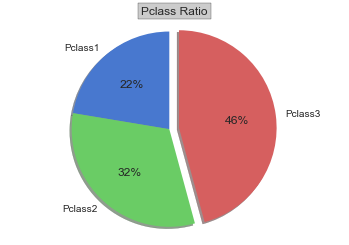

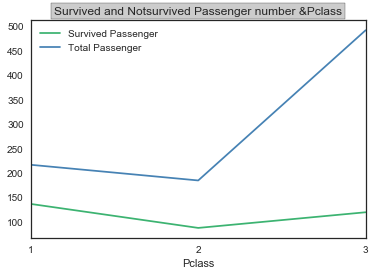

,PassengerNum,Pclass,Survived,Ratio
Pclass,,,,
1,216,1,136,62.962963
2,184,2,87,47.282609
3,491,3,119,24.236253


In [214]:
## analysis of the relationship between Pclass and Survive
## firstly show the percentage of each Pclass

explode = (0,0,0.1)
plt.pie(rate,explode=explode,labels=['Pclass1','Pclass2','Pclass3'],
        autopct='%1.0f%%',shadow=True, startangle=90)
plt.axis('equal')
sns.set(style="white", palette="muted", color_codes=True)
plt.title('Pclass Ratio',bbox={'facecolor':'0.8','pad':3})
plt.show()


## show the relationship between Pclass and Survival passengers number
## use line graph

PC = pd.DataFrame()

PC['PassengerNum'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].count()
PC['Pclass'] = PC.index.values
PC['Survived'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].sum()
PC['Ratio'] = PC.Survived / PC.PassengerNum * 100

fig = plt.figure()

pc1 = fig.add_subplot(111)
width = 0.7

PC.Survived.plot(kind='line', color='mediumseagreen', ax=pc1, label = 'Survived Passenger', xticks = PC['Pclass'])
PC.PassengerNum.plot(kind='line', color='steelblue', ax=pc1, label = 'Total Passenger', xticks = PC['Pclass'])
pc1.legend()

plt.title('Survived and Notsurvived Passenger number &Pclass',bbox={'facecolor':'0.8','pad':3})
plt.show()
PC

### from the figures below, young passengers in Pclass1 are more likely to survive
### and most of the passeners chose Pclass3

## 5.Age

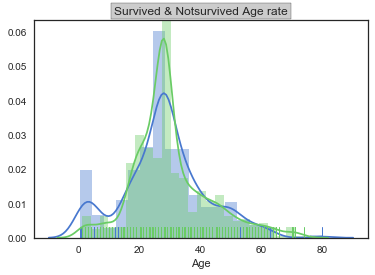

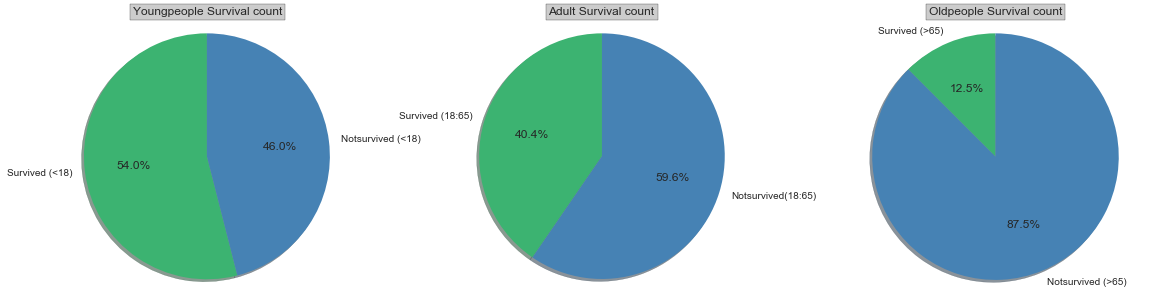

In [215]:
## fill the miss data in Age using median 
df["Age"] = df["Age"].fillna(df["Age"].median())

##divede data into Survived and NotSurvived
Survived_Age_df=df[df['Survived'] != 0]
NotSurvived_Age_df=df[df['Survived']== 0]

##show Age rate of survived and notsurvived passengers
sns.distplot(Survived_Age_df['Age'],kde = True, rug = True)
sns.distplot(NotSurvived_Age_df['Age'], kde = True, rug = True)
plt.title('Survived & Notsurvived Age rate',bbox={'facecolor':'0.8','pad':3})

plt.show() 

##show the relationship between Age and Survive
##set the sise of the figure
plt.figure(figsize=(20,5))

##define Youngpeople aged under 18 (df["Age"]<18)
Young_Survived = df.loc[(df["Survived"] == 1) & (df["Age"] <18)].Sex.count()
Young_Notsurvived= df.loc[(df["Survived"] == 0) & (df["Age"] <18)].Sex.count()
##define Adult aged under from 18 to 25 (df["Age"][18:25])
Adult_Survived = df.loc[(df["Survived"] == 1) & (df["Age"][18:65])].Sex.count()
Adult_Notsurvived = df.loc[(df["Survived"] == 0) & (df["Age"][18:65])].Sex.count()
##define Adult aged beyound (df["Age"]>65)
Old_Survived = df.loc[(df["Survived"] == 1) & (df["Age"] > 65)].Sex.count()
Old_Notsurvived = df.loc[(df["Survived"] == 0) & (df["Age"] >65)].Sex.count()

##three piechats of different age group
plt.subplot(131)
labels = 'Survived (<18)', 'Notsurvived (<18)'
sizes = [Young_Survived, Young_Notsurvived]
plt.pie(sizes,colors=['mediumseagreen','steelblue'], labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

plt.axis('equal')
plt.title('Youngpeople Survival count',bbox={'facecolor':'0.8','pad':3})


plt.subplot(132)
labels = 'Survived (18:65)', 'Notsurvived(18:65)'
sizes = [Adult_Survived , Adult_Notsurvived]

plt.pie(sizes, colors=['mediumseagreen','steelblue'], labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.title('Adult Survival count',bbox={'facecolor':'0.8','pad':3})


plt.subplot(133)
labels = 'Survived (>65)', 'Notsurvived (>65)'
sizes = [Old_Survived, Old_Notsurvived]

plt.pie(sizes, colors=['mediumseagreen','steelblue'], labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.title('Oldpeople Survival count',bbox={'facecolor':'0.8','pad':3})



plt.show() 

### from the figures below, young passengers are more likely to survive
### and for both the survived and notsurvived passengers, most of them aged between 20 to 40

## 6.Familysize

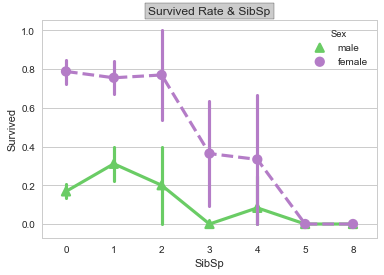

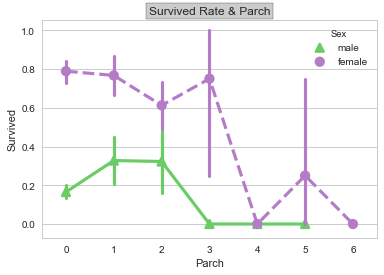

In [216]:
## show relationship between familysize and Survive
## familysize is related to SibSp and Parch

##relationship between SibSp and Survive for male and female
sns.set(style="whitegrid")  
sns.pointplot(x="SibSp", y="Survived", hue="Sex", data=df,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);
plt.title('Survived Rate & SibSp',bbox={'facecolor':'0.8','pad':3})
plt.show()

##relationship between Parch and Survive for male and female
sns.set(style="whitegrid")  
sns.pointplot(x="Parch", y="Survived", hue="Sex", data=df,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);
plt.title('Survived Rate & Parch',bbox={'facecolor':'0.8','pad':3})

plt.show()

###from the figures below, passengers with small familysize are more likely to survive

## 7.Fare & Age & Embarked

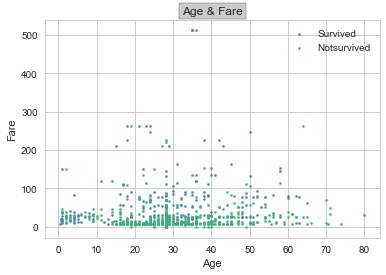

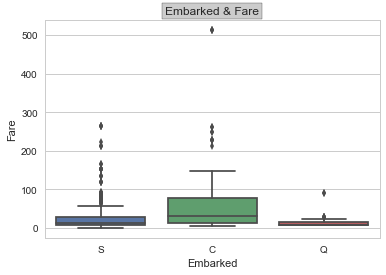

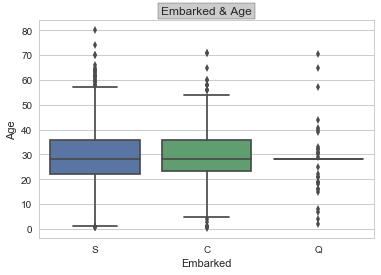

In [217]:
## using different types of figures to show other relationships
## Fare&Age&Embarked


## show the relationship between Fare and Age 
## using scattergram because there are large amount of numbers in these two data
Survived_fare = df.Fare[df.Survived==1]
Notsurvived_fare = df.Fare[df.Survived==0]

fig, fa1 = plt.subplots()
yS = df.Fare[df.Survived==1]
yNS = df.Fare[df.Survived==0]
xS = df.Age[df.Survived==1]
xNS = df.Age[df.Survived==0]

m = fa1.scatter(xS, yS, 5, 'steelblue')
fa1.hold
n = fa1.scatter(xNS, yNS, 5, 'mediumseagreen')
fa1.hold

fa1.set_ylabel('Fare')
fa1.set_xlabel('Age')

fa1.legend([m,n],['Survived','Notsurvived'])
fa1.grid(True)
plt.title('Age & Fare',bbox={'facecolor':'0.8','pad':3})
plt.show()



##show the relationship between Fare and Embarked using boxplot

sns.boxplot(x = df['Embarked'],y = df['Fare'])  
plt.title('Embarked & Fare',bbox={'facecolor':'0.8','pad':3})
plt.show()  

##show the relationship between Fare and Age using boxplot

sns.boxplot(x = df['Embarked'],y = df['Age']) 
plt.title('Embarked & Age',bbox={'facecolor':'0.8','pad':3})
plt.show()  